In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
step = pd.read_csv("./step.txt", sep=' ', decimal=',', header=None, names=["Step", "Tseq", "Tpar", "Tpar_ff"])
step = step.apply(pd.to_numeric)
dimension = pd.read_csv("./dimension.txt", sep=' ', decimal=',', header=None, names=["Dimension", "Tseq", "Tpar", "Tpar_ff"])
dimension = dimension.apply(pd.to_numeric)
time = pd.read_csv("./time.txt", sep=' ', decimal=',', header=None, names=["Parallel_degree", "Tseq", "Tpar", "Tpar_ff"])
time = time.apply(pd.to_numeric)

In [3]:
step

,Step,Tseq,Tpar,Tpar_ff
0,1,232169,62447.4,80172.6
1,10,227612,46128.4,70081.8
2,20,225176,57253.6,69641.4
3,50,223781,38722.9,69132.2
4,100,222670,37305.2,68712.3


In [4]:
dimension

,Dimension,Tseq,Tpar,Tpar_ff
0,10,605.8,9585.0,10011.6
1,100,48931.6,18214.0,21642.4
2,1000,4536200.0,952606.0,1399760.0
3,2000,18107700.0,3100460.0,5573840.0


In [5]:
time["sp"] = time["Tseq"]/time["Tpar"]
time["sp_ff"] = time["Tseq"]/time["Tpar_ff"]
time["serial_fraction"] = (time["Parallel_degree"]/(time["Parallel_degree"]-1))*(1-(1/time["sp"]))
time["serial_fraction_ff"] = (time["Parallel_degree"]/(time["Parallel_degree"]-1))*(1-(1/time["sp_ff"]))
time.replace([np.inf, -np.inf], 1, inplace=True)
time["non_serial"] = 1-time["serial_fraction"]
time["non_serial_ff"] = 1-time["serial_fraction_ff"]

In [6]:
time

,Parallel_degree,Tseq,Tpar,Tpar_ff,sp,sp_ff,serial_fraction,serial_fraction_ff,non_serial,non_serial_ff
0,1,4537610.0,5209932.0,5164300.0,0.870954,0.878650,1.000000,1.000000,0.000000,0.000000
1,2,4552090.0,2786400.0,2776250.0,1.633681,1.639654,0.775771,0.780231,0.224229,0.219769
2,4,4539064.0,1427007.0,1408190.0,3.180828,3.223332,0.914155,0.919683,0.085845,0.080317
3,8,4537324.0,1027230.0,1403035.0,4.417048,3.233935,0.884119,0.789462,0.115881,0.210538
4,16,4535120.0,666609.0,1406770.0,6.803268,3.223782,0.909879,0.735792,0.090121,0.264208
5,32,4534259.0,397700.0,1417240.0,11.401204,3.199359,0.941719,0.709613,0.058281,0.290387
6,64,4535810.0,299593.0,1433710.0,15.139906,3.163687,0.948774,0.694769,0.051226,0.305231
7,128,4534530.0,229262.0,1471660.0,19.778812,3.081235,0.956917,0.680773,0.043083,0.319227
8,256,4533230.0,252593.0,1542490.0,17.946776,2.938904,0.947983,0.662324,0.052017,0.337676


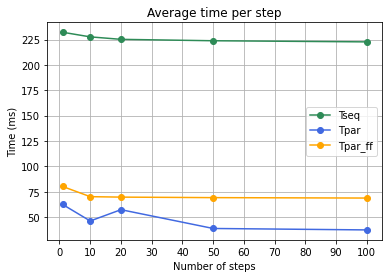

In [7]:
plt.title("Average time per step")
plt.grid()
plt.xticks(range(0,101,10))
plt.xlabel("Number of steps")
plt.ylabel("Time (ms)")
plt.plot(step["Step"], step["Tseq"]/1000, 'o-', color="seagreen", label="Tseq")
plt.plot(step["Step"], step["Tpar"]/1000, 'o-', color="royalblue", label="Tpar")
plt.plot(step["Step"], step["Tpar_ff"]/1000, 'o-', color="orange", label="Tpar_ff")
plt.legend()
#plt.savefig('./plot/steps.png', bbox_inches = "tight")
plt.show()

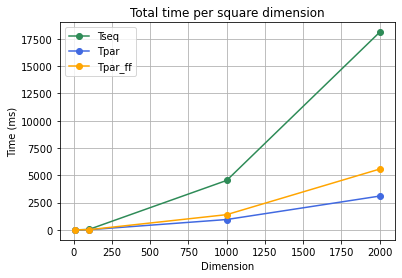

In [8]:
plt.title("Total time per square dimension")
plt.grid()
plt.xticks(range(0,3000,250))
plt.xlabel("Dimension")
plt.ylabel("Time (ms)")
plt.plot(dimension["Dimension"], dimension["Tseq"]/1000, 'o-', color="seagreen", label="Tseq")
plt.plot(dimension["Dimension"], dimension["Tpar"]/1000, 'o-', color="royalblue", label="Tpar")
plt.plot(dimension["Dimension"], dimension["Tpar_ff"]/1000, 'o-', color="orange", label="Tpar_ff")
plt.legend()
#plt.savefig('plot/dimension.png', bbox_inches = "tight")
plt.show()

In [ ]:
plt.title("Completion time")
plt.grid()
plt.xticks(range(0,512,32))
plt.xlabel("Parallel degree")
plt.ylabel("Time (ms)")
plt.plot(time["Parallel_degree"], time["Tseq"]/1000, 'o-', color="seagreen", label="Tseq")
plt.plot(time["Parallel_degree"], time["Tpar"]/1000, 'o-', color="royalblue", label="Tpar")
plt.plot(time["Parallel_degree"], time["Tpar_ff"]/1000, 'o-', color="orange", label="Tpar_ff")
plt.legend()
#plt.savefig('plot/completion_time.png', bbox_inches = "tight")
plt.show()

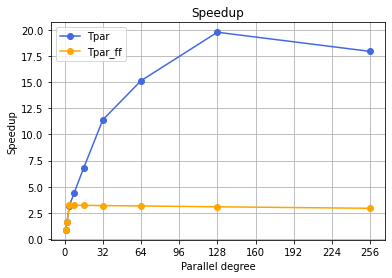

In [9]:
plt.title("Speedup")
plt.grid()
plt.xticks(range(0,512,32))
plt.xlabel("Parallel degree")
plt.ylabel("Speedup")
plt.plot(time["Parallel_degree"], time["Tseq"]/time["Tpar"], 'o-', color="royalblue", label="Tpar")
plt.plot(time["Parallel_degree"], time["Tseq"]/time["Tpar_ff"], 'o-', color="orange", label="Tpar_ff")
plt.legend()
#plt.savefig('plot/speedup.png', bbox_inches = "tight")
plt.show()

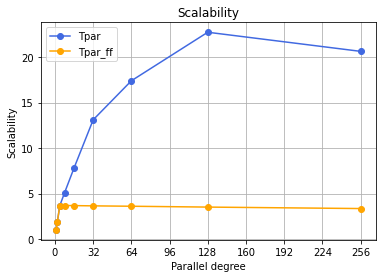

In [10]:
plt.title("Scalability")
plt.grid()
plt.xticks(range(0,512,32))
plt.xlabel("Parallel degree")
plt.ylabel("Scalability")
plt.plot(time["Parallel_degree"], time["Tpar"][0]/time["Tpar"], 'o-', color="royalblue", label="Tpar")
plt.plot(time["Parallel_degree"], time["Tpar_ff"][0]/time["Tpar_ff"], 'o-', color="orange", label="Tpar_ff")
plt.legend()
#plt.savefig('plot/scalability.png', bbox_inches = "tight")
plt.show()

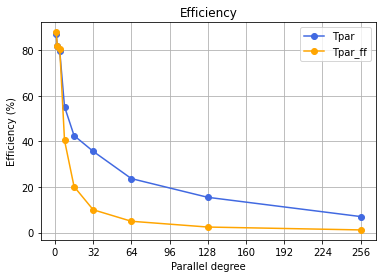

In [11]:
plt.title("Efficiency")
plt.grid()
plt.xticks(range(0,512,32))
plt.xlabel("Parallel degree")
plt.ylabel("Efficiency (%)")
plt.plot(time["Parallel_degree"], time["sp"]/time["Parallel_degree"]*100, 'o-', color="royalblue", label="Tpar")
plt.plot(time["Parallel_degree"], time["sp_ff"]/time["Parallel_degree"]*100, 'o-', color="orange", label="Tpar_ff")
plt.legend()
#plt.savefig('plot/efficiency.png', bbox_inches = "tight")
plt.show()

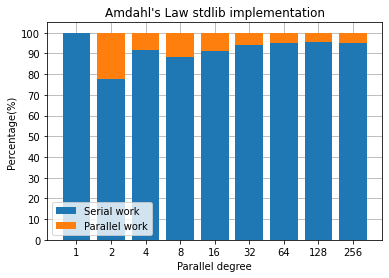

In [12]:
plt.title("Amdahl's Law stdlib implementation")
plt.grid(zorder=0)
plt.yticks(range(0,105,10))
plt.ylim(0,105)
plt.xlabel("Parallel degree")
plt.ylabel("Percentage(%)")
plt.bar(time["Parallel_degree"].apply(str), time["serial_fraction"]*100, label="Serial work", zorder=3)
plt.bar(time["Parallel_degree"].apply(str), time["non_serial"]*100, bottom=time["serial_fraction"]*100, label="Parallel work", zorder=3)
plt.legend()
#plt.savefig('plot/serial.png', bbox_inches = "tight")
plt.show()

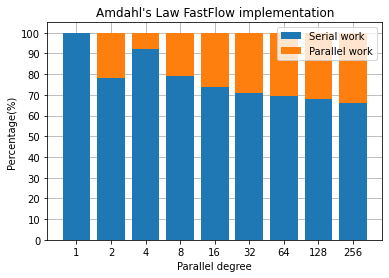

In [13]:
plt.title("Amdahl's Law FastFlow implementation")
plt.grid(zorder=0)
plt.yticks(range(0,105,10))
plt.ylim(0,105)
plt.xlabel("Parallel degree")
plt.ylabel("Percentage(%)")
plt.bar(time["Parallel_degree"].apply(str), time["serial_fraction_ff"]*100, label="Serial work", zorder=3)
plt.bar(time["Parallel_degree"].apply(str), time["non_serial_ff"]*100, bottom=time["serial_fraction_ff"]*100, label="Parallel work", zorder=3)
plt.legend()
#plt.savefig('plot/serial_ff.png', bbox_inches = "tight")
plt.show()